## IRIS Flower classification using Naive Bayes Algorithm - Compare Performances with Logistic Regression Classifiers

**Dataset Description:**

This is perhaps the best known database to be found in the pattern recognition literature. 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Predicted attribute: class of iris plant. 

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolor
-- Iris Virginica



In ScikitLearn we have many choices of defining the Naive Bayes object depending on the types of data (distribution of features).

### Gaussian Naive Bayes
---------------------
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian (continuous numeric features having Gaussian distribution)

### Multinomial Naive Bayes
-----------------------
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). 

### Bernoulli Naive Bayes
----------------------
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter in scikitlearn).


### Complement Naive Bayes
-----------------------
ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets.


### Load dependencies and libraries



In [13]:
# Hello World Classification: Iris flowers prediction

# Prepare Problem

# Load libraries
import pandas

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn import preprocessing 

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



### Load data from the IRIS flower dataset

 Let us load data directly from the UCI data repository.

In [14]:
# Load Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)



## Peek into data
Display summary of data

In [15]:
# Summarize Data

# Descriptive statistics
#---------------------------
# Shape
print(dataset.shape)

# Head
print(dataset.head(20))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

In [16]:
# Descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
# Class distribution
print(dataset.groupby('class').size())


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Quick Data Visualization

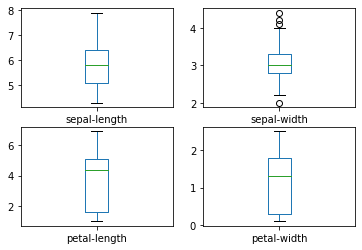

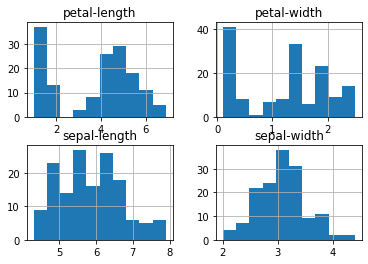

In [18]:
# Data visualizations
#----------------------------
# Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms
dataset.hist()
plt.show()


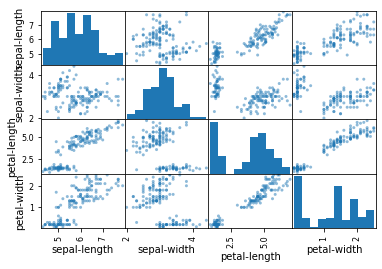

In [19]:
# Scatter plot matrix
scatter_matrix(dataset)
plt.show()


## Data Splitting and Preprocessing

In [20]:
# Prepare Data
#--------------------------------
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'


### Standardize Data

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_validation = scaler.transform(X_validation)


### Train the Model

Let us create three classifier and train them onthe training data.
We are creating Gaussian Naive Bayes classifier along with Support Vector Classifier and Logistic regression Classifier.

In [22]:
clf_nb=GaussianNB()
clf_nb.fit(X_train, y_train)

clf_lr=LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test the performances of the models

Test the performance of all the models using the validation set.

In [23]:
# Make predictions on validation dataset
#-------------------------------------------------
print('\n Naive Bayes............')
predictions = clf_nb.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))



 Naive Bayes............
0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



In [24]:
print('\n Logistic Regression...........')
predictions = clf_lr.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))



 Logistic Regression...........
0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

